<a href="https://colab.research.google.com/github/Indranil0603/Indranil-Sen_21JE0413_ML-Bootcamp/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

Importing Training data

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/Data for Woc/Polynomial_train.csv")

Getting Number of rows and columns

In [ ]:
data_rows = data_train.shape[0]
data_columns = data_train.shape[1]

Making array for features

In [ ]:
features = data_train.drop(["Unnamed: 0", "label"], axis=1)

In [ ]:
features.to_numpy()
t = features.copy()
X = features['X']
Y = features['Y']
Z = features['Z']

degrees =2
for i in range(2,degrees+1) : #Adding columns of X^2, Y^2, Z^2 features
  features = np.append(features, t**i, axis = 1)

XY = np.array([np.multiply(X,Y),np.multiply(Y,Z),np.multiply(Z,X)])
XY = np.transpose(XY)
features= np.append(features,XY, axis = 1 )#Adding columns of XY, YZ, ZX to features

Normalizing features

In [ ]:
mu = np.mean(features, axis = 0) # calculating mean value of features
stnd = np.std(features, axis = 0)# calculating standard daviations of features
features1 = np.divide(features-mu, stnd) # normalizing the features

Adding Column of ones to X 

In [ ]:
x_set = np.ones([data_rows,1], dtype = float)
x_set = np.append(x_set,features1, axis = 1 )
data_columns = x_set.shape[1] #Updating number of rows after addiing required columns to X

Making Array of labels

In [ ]:
label = data_train["label"]
y_set = label
y_set.to_numpy()

array([ 307.9729269 ,  136.39837542, -310.72481348, ...,  663.87365546,
       -421.00400451, -699.71868166])

Class for polynomial regression

In [ ]:
class ML_Polynomial:
  def __init__(self,learningrate, num_iters, X, Y, row, column):
    self.LR = learningrate
    self.n = num_iters
    self.x_set = X
    self.y_set = Y
    self.n_rows = row
    self.n_columns = column
    self.theta = np.zeros(self.n_columns, dtype = int)#Making arra of theta

  def costfunction(self):
    self.predicted =  np.dot(self.x_set,self.theta)
    self.difference =  (self.predicted - self.y_set)
    self.cost = (1/(2*self.n_rows))*np.sum(np.square(self.difference))
    plt.scatter(self.i,self.cost,c= "blue") #Making plot for the cost after each iteration
   
  def Gradient_descent(self):
    for self.i in range(self.n):
      self.costfunction()
      self.predicted =  np.dot(self.x_set,self.theta)
      self.slope = np.dot(np.transpose(self.x_set),self.difference)
      self.theta = self.theta - ((self.LR/self.n_rows)*(self.slope))
      self.theta[0] = self.theta[0] - ((self.LR/self.n_rows)*(np.sum(self.difference)))

  def report(self,X,Y):
    self.x_test = X
    data_rows = self.x_test.shape[0]   
    self.x_test1 =np.ones([data_rows,1], dtype = float)
    self.x_test = np.divide((self.x_test - mu), stnd)
    self.x_test1 = np.append(self.x_test1, self.x_test, axis = 1 )
    self.y_test = Y
    y_predicted = np.dot(self.x_test1 ,self.theta)  
    difference = (y_predicted - self.y_test)
    sumsq = np.sum(difference ** 2)
    error = (sumsq/self.n_rows)**(0.5)
    print("RMSE = ",error)

Training theta on the given data

In [ ]:
model = ML_Polynomial(0.08,2000,x_set,y_set,data_rows,data_columns)

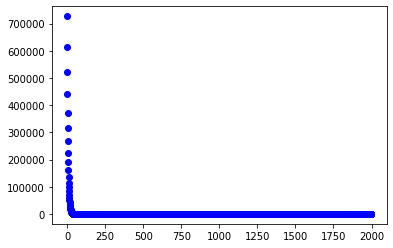

In [ ]:
model.Gradient_descent()

In [ ]:
model.cost

65.4327304699292

Testing the trained theta on test data

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Data for Woc/Polynomial_train.csv')
x_test = data_test.drop(['Unnamed: 0' , 'label'], axis = 1)
x_test.to_numpy()

t = x_test.copy()
X = x_test['X']
Y = x_test['Y']
Z = x_test['Z']
degrees =2
for i in range(2, degrees+1) : #Adding columns of X^2, Y^2, Z^2 x-test
  x_test = np.append(x_test, t**i, axis = 1)
XY = np.array([np.multiply(X,Y),np.multiply(Y,Z),np.multiply(Z,X)])
XY = np.transpose(XY)
x_test= np.append(x_test,XY, axis = 1 )#Adding columns of XY, YZ, ZX to x-test

y_test = data_test["label"]
y_test.to_numpy()
model.report(x_test, y_test)

11.439644266316082
